In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

## Load Data

In [2]:
cbg_umap = pd.read_csv('../data/fig2/cbg_umap.csv', dtype={'CBG': str})

## Plot

In [3]:
county2color = {
    'Essex': '#386cb0',
    'Middlesex': '#fdb462',
    'Norfolk': '#7fc97f',
    'Plymouth': '#ef3b2c',
    'Suffolk': '#662506',
    'Rockingham': '#a6cee3',
    'Strafford': '#fb9a99'
 }

### Fig 2a (left)

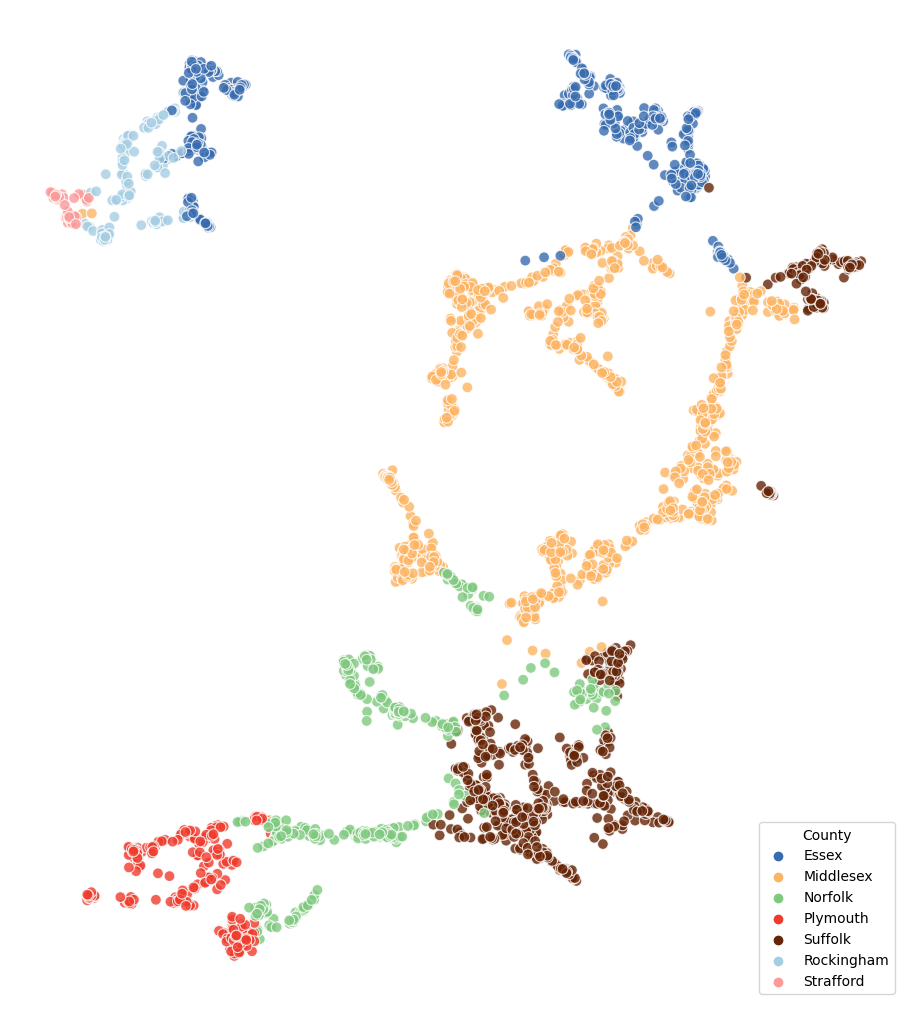

In [4]:
fig, ax = plt.subplots(figsize=(9, 10), constrained_layout=True)

for county_, color in county2color.items():
    ax.scatter([], [], color=color, label=county_)
ax.scatter(-cbg_umap['y'], -cbg_umap['x'], c=cbg_umap['color'], s=60, edgecolors='white', linewidths=0.8, alpha=0.8)

# remove all ticks
ax.set_xticks([])
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend(fontsize=10, title="County", loc='lower right')
plt.show()

# save the plot as pdf
plot_file = os.path.join('../outputs/fig2_a_left.pdf')
fig.savefig(plot_file, dpi=300, bbox_inches='tight')


## Fig 2c

In [5]:
# For visual clearance, we remove the neighborhoods with limited CBGs
selected_nei_1 = ['Dorchester', 'Roxbury', 'South Boston', 'Hyde Park', 'Hyde Park']
selected_nei_2 = ['Fenway', 'Allston', 'Brighton', 'Back Bay', 'Chinatown', 'South End', 'Jamaica Plain']

selected_cbg_umap = cbg_umap[(~cbg_umap['Bos_Neighborhood'].isna()) & (cbg_umap['color'] == '#662506') & (cbg_umap['Bos_Neighborhood'].isin(selected_nei_2))].copy()
# Step 1: Determine the x and y ranges from selected_cbg_umap
x_min, x_max = selected_cbg_umap['x'].min(), selected_cbg_umap['x'].max()
y_min, y_max = selected_cbg_umap['y'].min(), selected_cbg_umap['y'].max()

# Step 2: Filter cbg_umap based on these ranges
zoom_in_cbg_umap = cbg_umap[(cbg_umap['x'] >= x_min) & (cbg_umap['x'] <= x_max) &
                             (cbg_umap['y'] >= y_min) & (cbg_umap['y'] <= y_max)].copy()

colors = [
  "#FB4934",
  "#83A598",
  "#FABD2F",
  "#FE8019",
  "#D3869B",
  "#8EC07C",
  "#B8BB26"
]
color2nei = {selected_nei_2[i]: colors[i] for i in range(len(selected_nei_2))}

# Step 3: Map the ['Bos_Neighborhood'] using color2nei
def map_neighborhood_color(neighborhood):
    return color2nei.get(neighborhood, '#dfdfdf')

zoom_in_cbg_umap['nei_color'] = zoom_in_cbg_umap['Bos_Neighborhood'].apply(map_neighborhood_color)


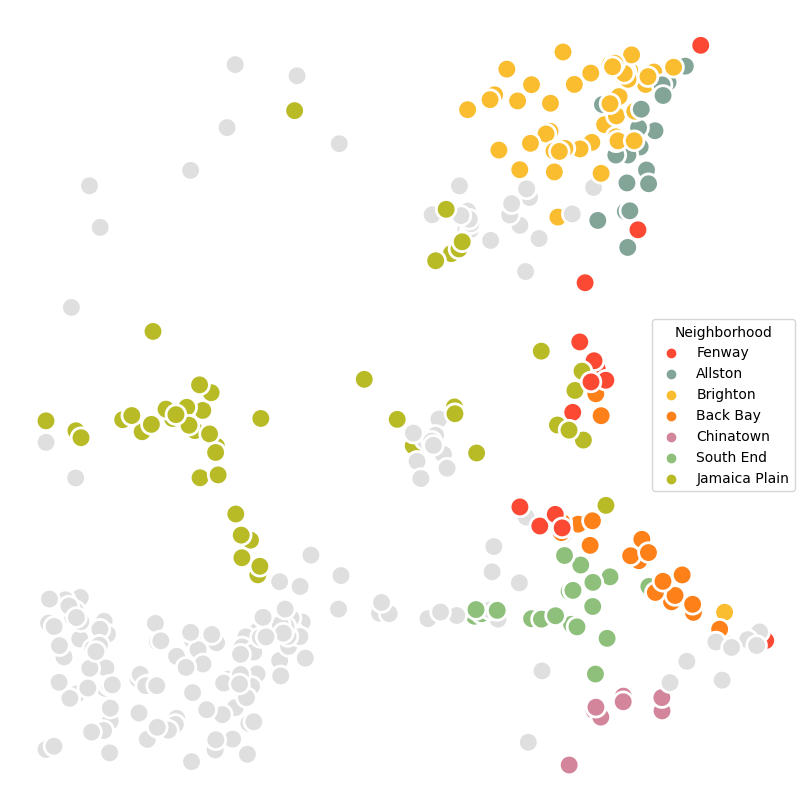

In [6]:
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)

for nei_, color in color2nei.items():
    ax.scatter([], [], color=color, label=nei_)

ax.scatter(-zoom_in_cbg_umap['y'], -zoom_in_cbg_umap['x'], c=zoom_in_cbg_umap['nei_color'], s=200, edgecolors='white', linewidths=2, alpha=1)

# remove all ticks
ax.set_xticks([])
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend(fontsize=10, title="Neighborhood")

plot_file = os.path.join('../outputs/fig2_c.pdf')
fig.savefig(plot_file, dpi=300, bbox_inches='tight')

## Fig 2a (center) 

In [7]:
CBGs = gpd.read_file('../data/fig2/14460_MSA_blocks_cut_boundary.geojson')
CBGs['county'] = CBGs['GEOID'].apply(lambda x: x[:5])

id2county = {
    '25009': "Essex",
    '25017': "Middlesex",
    '25021': "Norfolk",
    '25023': "Plymouth",
    '25025': "Suffolk",
    '33015': "Rockingham",
    '33017': "Strafford",
}
CBGs['color'] = CBGs['county'].apply(lambda x: county2color[id2county[x]] if x in id2county else '#dfdfdf')

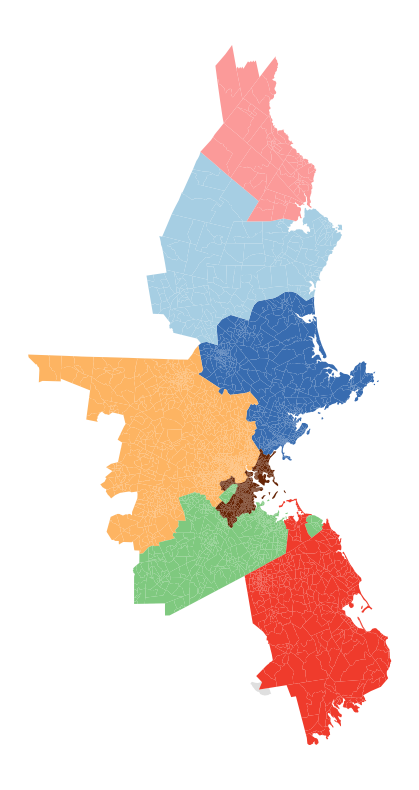

In [8]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))  # You can adjust the size as needed
CBGs.plot(ax=ax, color=CBGs['color'])
for county_, color in county2color.items():
    ax.scatter([], [], color=color, label=county_)

# Optional: Add additional customizations
# ax.set_title(f"Boston CBSA")
ax.set_xticks([])
ax.set_yticks([])
ax.set_axis_off()  # To turn off the axis
# ax.legend()

plt.show()

# save the plot as pdf
plot_file = os.path.join('../outputs/fig2_a_center.pdf')
fig.savefig(plot_file, dpi=300, bbox_inches='tight')
